<div style="color: #2590c2; text-align: center;">
<span style="font-size:18pt;"><b>ST: BIG DATA ANALYTICS</b></span><br/>
<span>CS 696-16 (Fall'18)</span><br/><br/>
<span><b>Project 2</b></span><br/><br/>
<span>Submitted By</span><br/>
<span>Ashok Kumar Shrestha</span>
</div>

In [ ]:
# Breast Cancer Wisconsin (Diagnostic)
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [ ]:
import numpy as np 
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importing the Dataset
try:
    data = pd.read_csv('data.csv')
    print(data.head())
    print('Breast Cancer Wisconsin (Diagnostic) Data set loaded.')
except:
    print('Sorry! Dataset could not be loaded.')

In [ ]:
# Data set information
data.info()

In [ ]:
# Formatting data sets
cols_drop = ['id', 'Unnamed: 32']
data = data.drop(cols_drop, axis=1)

In [ ]:
# Encode diagnosis label
y = data.diagnosis

# Scaling Data set
X = data.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

In [ ]:
# Data Visualization for data sets
import seaborn as sns

ax = sns.countplot(y,label="Count")       
B, M = y.value_counts()
print('No. of Benign: ',B)
print('No. of Malignant : ',M)

In [ ]:
# Correlation Heatmap for datasets
figure, (a) = plt.subplots(1, 1, figsize=(20,10))

hm = sns.heatmap(data.corr(), 
                 ax=a,
                 cmap="BuGn", 
                 annot=True, 
                 linewidths=.1)

figure.suptitle('Correlation Heatmap for Breast Cancer Wisconsin (Diagnostic)', 
              fontsize=16, 
              fontweight='bold');
figure.savefig('heatmap.png')

In [ ]:
# Classifiers
# 1. KNN
# 2. Logistic Regression
# 3. Decision Tree
# 4. Random Forest
# 5. Neural Network MLP
# 6. SVM

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression    
from sklearn.tree import DecisionTreeClassifier        
from sklearn.ensemble import RandomForestClassifier    
from sklearn.neural_network import MLPClassifier       
from sklearn.svm import SVC                            
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [ ]:
#load the breast cancer data and few EDA
data = load_breast_cancer()
#print(data.DESCR)

In [ ]:
#----------------------------- KNN Classifier --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=66)

training_accuracy = []
test_accuracy = []


neighbors_setting = range(1,10)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_setting,training_accuracy, marker='o', label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, marker='*', label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))

In [ ]:
knn

In [ ]:
#-------------------------------------- Logistic Regression --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))


In [ ]:
log_reg

In [ ]:
#-------------------------------------- Decision Tree --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,10)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))

plt.plot(max_dep,training_accuracy, marker="o", label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, marker="*",label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

print("Accuracy of the training set for 3NN: {:3f}".format(training_accuracy[2]))
print("Accuracy of the test set for 3NN: {:3f}".format(test_accuracy[2]))

In [ ]:
tree

In [ ]:

from matplotlib.pyplot import savefig

#-------------------------------------- Feature Importance --------------------------------------
n_feature = data.data.shape[1]
plt.figure(figsize=(4,8))
plt.barh(range(n_feature), tree.feature_importances_, 0.8, color="green", align='center')
plt.yticks(np.arange(n_feature), data.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()
savefig('tree.png')

In [ ]:
# -------------------------------------- Random Forests --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print('acc for training data: {:.3f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(forest.score(X_test,y_test)))

In [ ]:
forest

In [ ]:
#-------------------------------------- Feature Importance --------------------------------------
n_feature = data.data.shape[1]
plt.figure(figsize=(4,8))
plt.barh(range(n_feature), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), data.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()
savefig('tree.png')

In [ ]:
# -------------------------------------- Neural Network --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled,y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp

In [ ]:
# -------------------------------------- SVM (Support Vector Machine) --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

In [ ]:
svm

In [ ]:
# Clustering
# 1. KMeans Clustering
# 2. Hierarchical Agglomerative Clustering 
# 3. Spectral Clustering

In [72]:
import numpy as np 
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
# Importing the Dataset
try:
    data = pd.read_csv('data.csv')
    #print(data.head())
    print('Breast Cancer Wisconsin (Diagnostic) Data set loaded.')
except:
    print('Sorry! Dataset could not be loaded.')

Breast Cancer Wisconsin (Diagnostic) Data set loaded.


In [74]:
# -------------------------------------- Preprocessing data set --------------------------------------

# Drop unnecessary columns
cols_drop = ['id', 'Unnamed: 32']
data = data.drop(cols_drop, axis=1)

# Encode diagnosis label
y_test = pd.DataFrame()
y_test['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

# Featureset creation
#X = data.drop('diagnosis', axis=1)
#X = StandardScaler().fit_transform(X)

data = data.drop('diagnosis', axis=1)

X = StandardScaler().fit_transform(data)

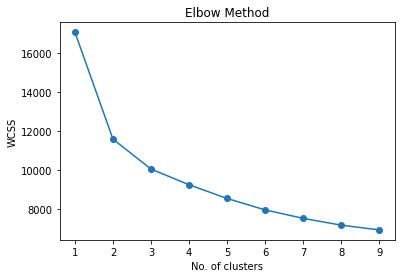

In [75]:
# ------------------- find the optimal number of clusters using elbow method -------------------
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

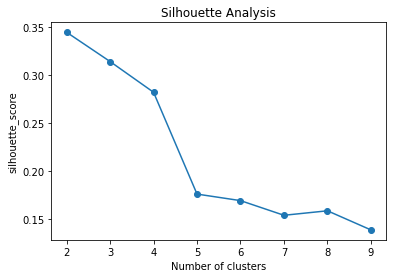

In [76]:
# ------------------- Silhouette Analysis ------------------- 
from sklearn.metrics import silhouette_score

sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1], marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show();

************** K-Means Clustering ****************
0.08963093145869948
             precision    recall  f1-score   support

          0       0.07      0.04      0.05       357
          1       0.10      0.17      0.12       212

avg / total       0.08      0.09      0.08       569



Text(0.5,1,'KMeans clustering')

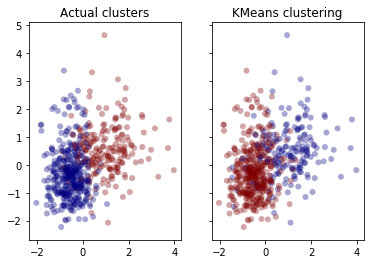

In [69]:
#-------------------------------------- KMeans Clustering --------------------------------------

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(X)

print("************** K-Means Clustering ****************")
print(accuracy_score(y_test, km_pred))
print(classification_report(y_test, km_pred))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=y_test["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering")

************ Hierarchical Agglomerative Clustering **************
0.1195079086115993
             precision    recall  f1-score   support

          0       0.11      0.06      0.07       357
          1       0.12      0.23      0.16       212

avg / total       0.11      0.12      0.11       569



Text(0.5,1,'Agglomeratve clustering')

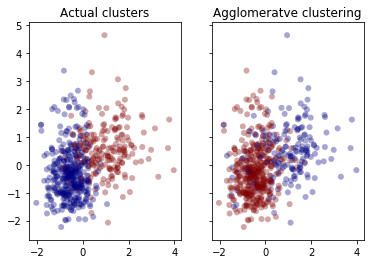

In [70]:
#-------------------------------------- Hierarchical Agglomerative Clustering --------------------------------------

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing

#X = pd.DataFrame(preprocessing.scale(data.iloc[:,:]))
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
ac_pred = ac.fit_predict(X)

print("************ Hierarchical Agglomerative Clustering **************")
print(accuracy_score(y_test, ac_pred))
print(classification_report(y_test, ac_pred))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=y_test["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ac_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Agglomeratve clustering")


*************** Spectral Clustering ****************
0.6309314586994728
             precision    recall  f1-score   support

          0       0.63      1.00      0.77       357
          1       1.00      0.01      0.02       212

avg / total       0.77      0.63      0.49       569



Text(0.5,1,'Spectral clustering')

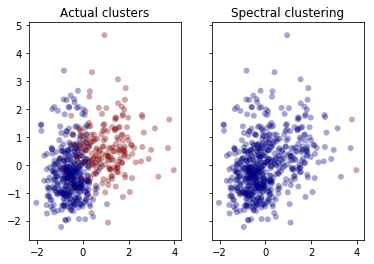

In [71]:
#-------------------------------------- Spectral Clustering --------------------------------------

from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2, gamma=0.5, affinity="rbf", assign_labels="discretize")
sc_pred = sc.fit_predict(X)

print("*************** Spectral Clustering ****************")
print(accuracy_score(y_test, sc_pred))
print(classification_report(y_test, sc_pred))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=y_test["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=sc_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Spectral clustering")


In [ ]:
#-------------------------------------- cluster validation --------------------------------------

from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, MeanShift, estimate_bandwidth


data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

algorithms = []

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)


algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(SpectralClustering(n_clusters=10, random_state=1, affinity='nearest_neighbors'))

data = []
for algo in algorithms:
    algo.fit_predict(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Agglomerative', 'Spectral'])

results